"""
Example of creating a CDCM system of a YABML
single zone with uncertainty building.

Author(s):
    Sreehari Manikkan

Date:
    05/23/2022
"""

In [21]:
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from yabml import *
from cdcm import *

from building_system import make_building_cdcm_system
from single_zone_random import single_zone_building

In [22]:
df = pd.read_csv("./rc_system_data/weather_data_2017_pandas.csv")

weather_sys = make_data_system(
    df[["Tout", "Qsg", "Qint"]],
    name="weather_sytem",
    column_units=["degC", "Wh", "Wh"],
    column_desciptions=[
        "Outdoor air temperature",
        "Solar irradiance",
        "Internal heat gain"
    ]
)


['Tout' 'Qsg' 'Qint'] ['degC', 'Wh', 'Wh'] ['Outdoor air temperature', 'Solar irradiance', 'Internal heat gain'] (True, True, True)


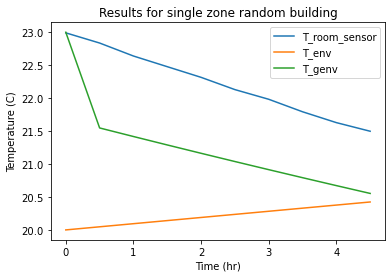

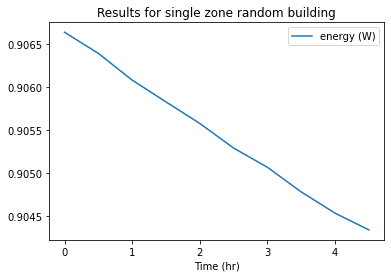

In [23]:
clock = make_clock(1800)

for single_zone_building_sample in single_zone_building.sample(1):
    building_system = make_building_cdcm_system(single_zone_building_sample,
                                                weather_sys,
                                                clock)[0]
    max_steps = 10
    file_name = "test2_building.h5"

    if os.path.exists(file_name):
        os.remove(file_name)

    test2_saver = SimulationSaver(file_name,
                                building_system,
                                max_steps=max_steps
    )

    for i in range(max_steps):
        building_system.forward()
        test2_saver.save()
        building_system.transition()


    T_room_sensor = (
        test2_saver.file_handler[
            "/zone_cdcm_system/zone_rc_system/T_room_sensor"
        ][:]
    )
    T_env = (
        test2_saver.file_handler["/zone_cdcm_system/zone_rc_system/T_env"][:]
    )
    T_genv = (
        test2_saver.file_handler["/zone_cdcm_system/zone_rc_system/T_genv"][:]
    )
    energy = (
        test2_saver.file_handler["/zone_cdcm_system/zone_hvac_system/energy"][:]
    )

    time = np.arange(max_steps) * 0.5
    plt.plot(time, T_room_sensor, label='T_room_sensor')
    plt.plot(time, T_env, label='T_env')
    plt.plot(time, T_genv, label='T_genv')
    plt.ylabel('Temperature (C)')
    plt.xlabel('Time (hr)')
    plt.title('Results for single zone random building')
    plt.legend()
    plt.show()

    plt.plot(time, energy, label='energy (W)')
    plt.xlabel('Time (hr)')
    plt.title('Results for single zone random building')
    plt.legend()
    plt.show()